In [ ]:
import json
import os
import shutil
from PIL import Image
from tqdm import tqdm

data_root = '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images'

In [ ]:
import random

filepath_list = []
for filename in os.listdir(data_root):
    if filename.endswith(('jpg', 'jpeg', 'bmp', 'BMP', 'png', 'PNG')):
        filepath_list.append(os.path.join(data_root, filename))
random.shuffle(filepath_list)

annotations = []
for i in range(len(filepath_list)):
    dst_filepath_list = random.sample(filepath_list, 3)
    for j in range(len(dst_filepath_list)):
        src_filepath = filepath_list[i]
        dst_filepath = dst_filepath_list[j]
        if src_filepath == dst_filepath:
            continue
        annotations.append(
            [
                src_filepath, dst_filepath
            ]
        )
random.shuffle(annotations)


In [ ]:
print(filepath_list[:10])

['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_desk_66.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/white_desk_47.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_mini_keyboard_19.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/blue_mini_keyboard_30.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_tenkeyless_keyboard_141.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_desk_24.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/brown_desk_172.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_full_keyboard_146.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/blue_mini_keyboard_9.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapte

In [ ]:
print(f"데이터 쌍의 개수 : {len(annotations)}")

데이터 쌍의 개수 : 7059


In [ ]:
print(annotations[:10])

[['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/blue_full_keyboard_98.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/030_0ce32c97.jpg'], ['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_mini_keyboard_99.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_full_keyboard_86.jpg'], ['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/blue_mini_keyboard_103.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/black_full_keyboard_102.jpg'], ['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/017_69842f5a.jpg', '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/blue_tenkeyless_keyboard_14.jpg'], ['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/053_26f8f851.jpg', '/content/drive/Othercomputers/내 Mac/Chapt

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import random

class PairDataset(Dataset):
    def __init__(self,
                 annotations,
                 src_transform=None,
                 dst_transform=None):
        self.annotations = annotations
        self.src_transform = src_transform
        self.dst_transform = dst_transform
        self.class_list = [0, 1]
        self.num_classes = len(self.class_list)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):

        annot = self.annotations[idx]
        image1_path, image2_path = annot
        anchor_image = Image.open(image1_path).convert('RGB')
        pos_image = Image.open(image1_path).convert("RGB")
        neg_image = Image.open(image2_path).convert("RGB")

        if self.src_transform:
            anchor_image = self.src_transform(image=np.array(anchor_image))['image']
        if self.dst_transform:
            pos_image = self.dst_transform(image=np.array(pos_image))['image']
            if random.randint(1, 3) == 1:
                neg_image = self.dst_transform(image=np.array(neg_image))['image']
            else:
                neg_image = self.src_transform(image=np.array(neg_image))['image']

        return anchor_image, pos_image, neg_image

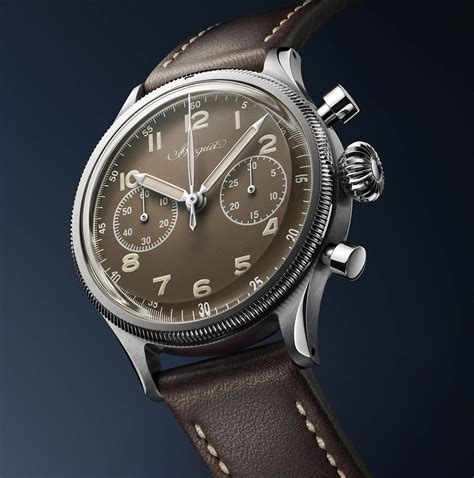

In [ ]:
dataset = PairDataset(annotations=annotations)
data = dataset[3]
data[0]

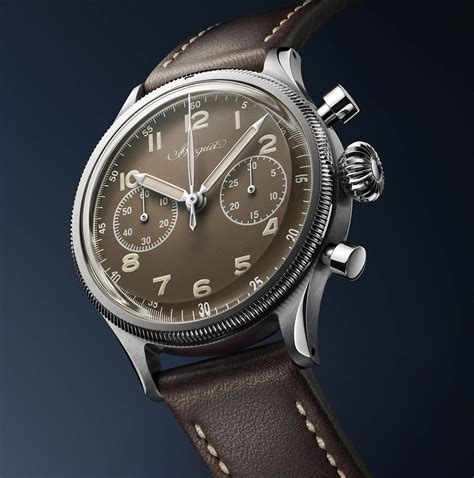

In [ ]:
data[1]

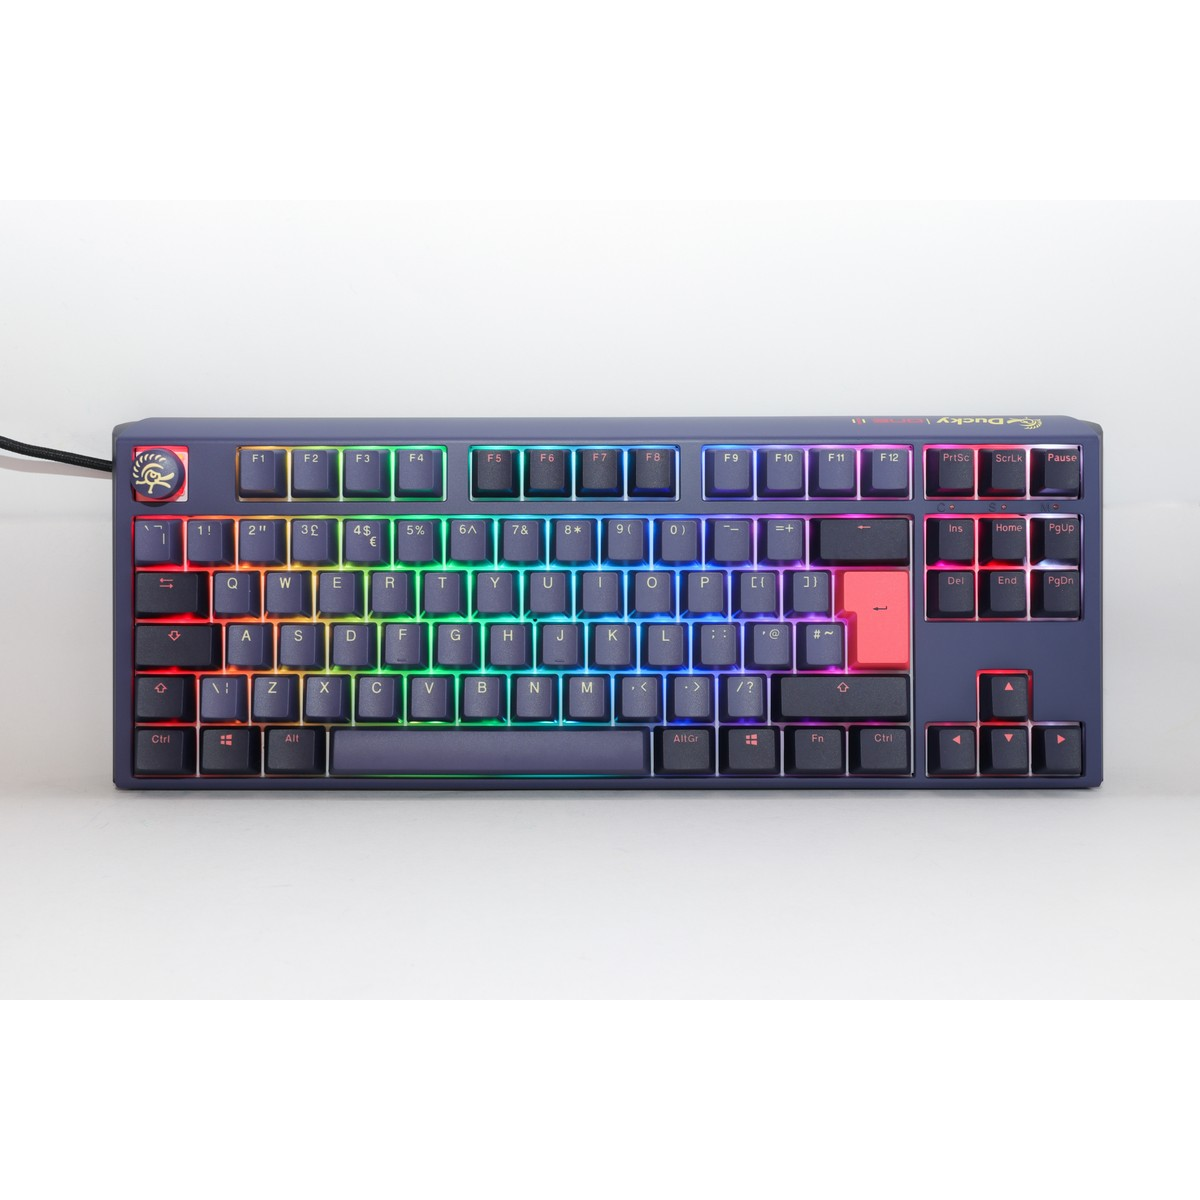

In [ ]:
data[2]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def draw_images(images):
    # 4x2의 그리드 생성 (바둑판 이미지 틀 생성)
    fig, axs = plt.subplots(4, 2, figsize=(12, 6))

    # 각 하위 그래프에 이미지 출력
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i]) # 이미지를 바둑판에 출력

    plt.tight_layout()
    plt.show()

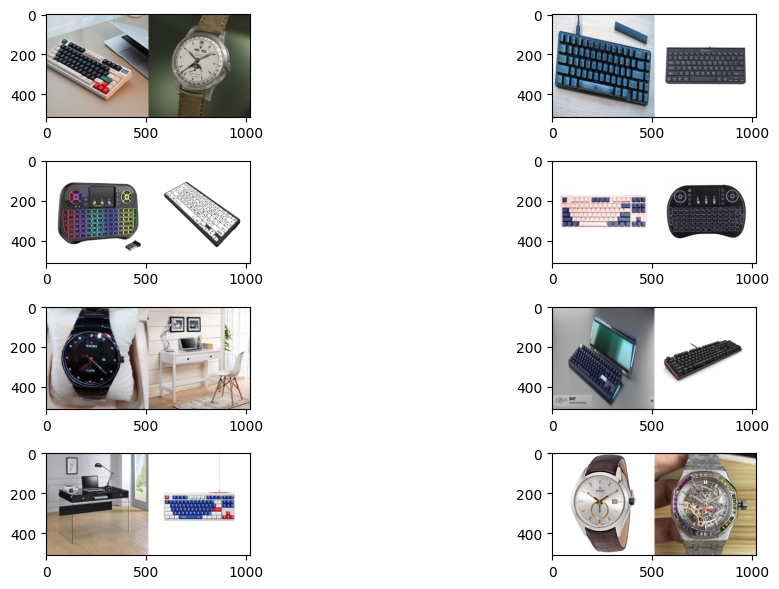

In [ ]:
from PIL import Image
import numpy as np
import random

def image_concat(image1, image2, image3=None):
    width1, height1 = image1.size
    width2, height2 = image2.size
    new_width = width1 + width2
    new_height = max(height1, height2)

    if image3:
        width3, height3 = image3.size
        new_width += width3
        new_height = max(new_height, height3)

    concat_image = Image.new('RGB', (new_width, new_height))
    concat_image.paste(image1, (0, 0))

    concat_image.paste(image2, (width1, 0))

    if image3:
        concat_image.paste(image3, (width1 + width2, 0))

    return concat_image

random.shuffle(annotations)


sample_images = []
sample_cnt = 0
max_cnt = 8
for annot in annotations:
    image1_path, image2_path = annot
    image1 = Image.open(image1_path).convert('RGB').resize((512, 512))
    image2 = Image.open(image2_path).convert('RGB').resize((512, 512))

    merged_image = image_concat(image1, image2)

    sample_images.append(merged_image)
    sample_cnt += 1
    if sample_cnt == max_cnt:
        break

draw_images(sample_images)

In [ ]:
len_annot = len(annotations)
train_annot = annotations[ : int(len_annot * 0.9)]
val_annot = annotations[int(len_annot * 0.9) : ]

print(f'학습 데이터 개수 : {len(train_annot)}')
print(f'검증 데이터 개수 : {len(val_annot)}')

학습 데이터 개수 : 6353
검증 데이터 개수 : 706


In [ ]:

hyper_params = {
    'num_epochs': 10,
    'lr': 0.0001,
    'image_size': 224,
    'train_batch_size': 32,
    'val_batch_size': 16,
    'print_preq': 0.1
}

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2


sample_src_transform = A.Compose([
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  value = 0,
                  always_apply=True,
                  border_mode=0),
    # A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ## 이미지 픽셀 값 정규화
    # ToTensorV2() ## 모델에 입력할 때 사용
])

sample_dst_transform = A.Compose([
    A.ShiftScaleRotate(rotate_limit=35, shift_limit=0.1, scale_limit=0.3, p=1, border_mode=0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.3),
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  always_apply=True,
                  value = 0,
                  border_mode=0),
    A.ColorJitter(p=0.5),
    # A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ## 이미지 픽셀 값 정규화
    # ToTensorV2() ## 모델에 입력할 때 사용
])

sample_dataset = PairDataset(annotations=annotations,
                             src_transform=sample_src_transform,
                             dst_transform=sample_dst_transform)

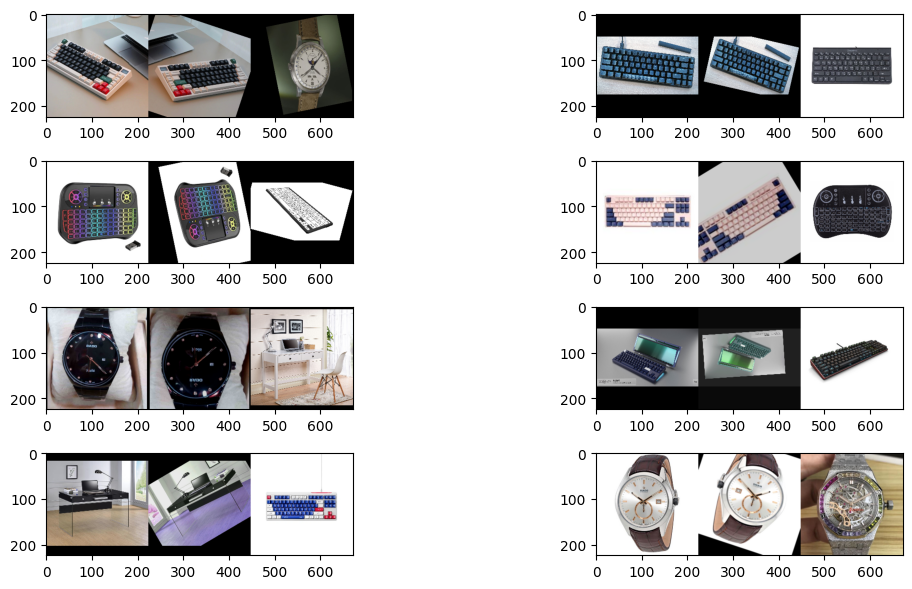

In [ ]:
transformed_images = []
targets = []

max_cnt = 8
for idx, (anchor_image, pos_image, neg_image) in enumerate(sample_dataset):
    if idx == max_cnt:
        break
    merged_image = image_concat(Image.fromarray(anchor_image), Image.fromarray(pos_image), Image.fromarray(neg_image))
    transformed_images.append(np.array(merged_image))


draw_images(transformed_images)

In [ ]:
src_transform = A.Compose([
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  always_apply=True,
                  value = 0,
                  border_mode=0),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

dst_transform = A.Compose([
    A.ShiftScaleRotate(rotate_limit=35, shift_limit=0.1, scale_limit=0.3, p=1, border_mode=0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.3),
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  always_apply=True,
                  value = 0,
                  border_mode=0),
    A.ColorJitter(p=0.5),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

train_dataset = PairDataset(annotations=train_annot,
                            src_transform=src_transform,
                            dst_transform=dst_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=hyper_params['train_batch_size'],
                                               num_workers=4, shuffle=True)

val_dataset = PairDataset(annotations=val_annot,
                          src_transform=src_transform,
                           dst_transform=dst_transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=hyper_params['val_batch_size'],
                                             num_workers=4, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
import torch
import torch.nn as nn
import timm

class FeatureModel(nn.Module):
    def __init__(self):
        super(FeatureModel, self).__init__()
        self.feature_extractor = timm.create_model('resnet18', pretrained=True, num_classes=0)

    def forward_once(self, x):
        return self.feature_extractor(x)

    def forward(self, x1, x2, x3):
        f1 = self.forward_once(x1)
        f2 = self.forward_once(x2)
        f3 = self.forward_once(x3)
        return f1, f2, f3

In [ ]:
model = FeatureModel()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [ ]:
!pip install wandb


In [ ]:
wandb login

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import f1_score

# criterion = TripletLoss()
# optimizer = optim.Adam(model.parameters(), lr=hyper_params['lr'])

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# num_epochs = hyper_params['num_epochs']
# model_save_dir = '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/part2_chapter35_train_results'
# os.makedirs(model_save_dir, exist_ok=True)

# min_loss = 100
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     epoch_loss = 0.0
#     print_cnt = int(len(train_dataloader) * hyper_params['print_preq'])

#     for idx, (anchor_image, pos_image, neg_image) in enumerate(train_dataloader):
#         anchor_image, pos_image, neg_image = anchor_image.to(device), pos_image.to(device), neg_image.to(device)

#         output1, output2, output3 = model(anchor_image, pos_image, neg_image)
#         loss = criterion(output1, output2, output3)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         epoch_loss += loss.item()

#         if idx % print_cnt == 0:
#             print(f"Epoch [{epoch+1}/{num_epochs}], "
#                   f"Iter [{idx}/{len(train_dataloader)}] "
#                   f"Loss: {running_loss/print_cnt:.4f}")
#             running_loss = 0.0

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_dataloader):.4f}")

#     model_save_path = os.path.join(model_save_dir, f'{epoch}_model.pth')
#     torch.save(model.state_dict(), model_save_path)

#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for anchor_image, pos_image, neg_image in val_dataloader:
#             anchor_image, pos_image, neg_image = anchor_image.to(device), pos_image.to(device), neg_image.to(device)
#             output1, output2, output3 = model(anchor_image, pos_image, neg_image)
#             loss = criterion(output1, output2, output3)
#             val_loss += loss.item()
#     val_loss /= len(val_dataloader)

#     if val_loss < min_loss:
#         model_save_path = os.path.join(model_save_dir, f'best_model.pth')
#         torch.save(model.state_dict(), model_save_path)
#         min_loss = val_loss

#     print(f"Val Loss : {val_loss:.4f}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

criterion = TripletLoss()
optimizer = optim.Adam(model.parameters(), lr=hyper_params['lr'])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = hyper_params['num_epochs']
model_save_dir = '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/part2_chapter35_train_results'
os.makedirs(model_save_dir, exist_ok=True)

min_loss = 100


wandb.init(project="Siamense_imgclass", config=hyper_params)
config = wandb.config

min_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    epoch_loss = 0.0
    print_cnt = int(len(train_dataloader) * config['print_preq'])

    for idx, (anchor_image, pos_image, neg_image) in enumerate(train_dataloader):
        anchor_image, pos_image, neg_image = anchor_image.to(device), pos_image.to(device), neg_image.to(device)

        output1, output2, output3 = model(anchor_image, pos_image, neg_image)
        loss = criterion(output1, output2, output3)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()

        if idx % print_cnt == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Iter [{idx}/{len(train_dataloader)}] "
                  f"Loss: {running_loss/print_cnt:.4f}")
            wandb.log({"Train Loss (Iter)": running_loss / print_cnt})
            running_loss = 0.0

    epoch_loss /= len(train_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    wandb.log({"Train Loss (Epoch)": epoch_loss, "Epoch": epoch + 1})

    model_save_path = os.path.join(model_save_dir, f'{epoch}_model.pth')
    torch.save(model.state_dict(), model_save_path)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for anchor_image, pos_image, neg_image in val_dataloader:
            anchor_image, pos_image, neg_image = anchor_image.to(device), pos_image.to(device), neg_image.to(device)
            output1, output2, output3 = model(anchor_image, pos_image, neg_image)
            loss = criterion(output1, output2, output3)
            val_loss += loss.item()
    val_loss /= len(val_dataloader)

    if val_loss < min_loss:
        model_save_path = os.path.join(model_save_dir, f'best_model.pth')
        torch.save(model.state_dict(), model_save_path)
        min_loss = val_loss

    print(f"Val Loss : {val_loss:.4f}")
    wandb.log({"Validation Loss": val_loss, "Epoch": epoch + 1})

wandb.save(os.path.join(model_save_dir, '*'))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/10], Iter [0/199] Loss: 0.0131


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/10], Iter [19/199] Loss: 0.3047
Epoch [1/10], Iter [38/199] Loss: 0.1846
Epoch [1/10], Iter [57/199] Loss: 0.1548
Epoch [1/10], Iter [76/199] Loss: 0.0324
Epoch [1/10], Iter [95/199] Loss: 0.0945
Epoch [1/10], Iter [114/199] Loss: 0.0399
Epoch [1/10], Iter [133/199] Loss: 0.0278
Epoch [1/10], Iter [152/199] Loss: 0.0293
Epoch [1/10], Iter [171/199] Loss: 0.0586
Epoch [1/10], Iter [190/199] Loss: 0.0217
Epoch [1/10], Loss: 0.0932


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.2951


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/10], Iter [0/199] Loss: 0.0174


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/10], Iter [19/199] Loss: 0.0342
Epoch [2/10], Iter [38/199] Loss: 0.0370
Epoch [2/10], Iter [57/199] Loss: 0.0286
Epoch [2/10], Iter [76/199] Loss: 0.0178
Epoch [2/10], Iter [95/199] Loss: 0.0106
Epoch [2/10], Iter [114/199] Loss: 0.0417
Epoch [2/10], Iter [133/199] Loss: 0.0101
Epoch [2/10], Iter [152/199] Loss: 0.0743
Epoch [2/10], Iter [171/199] Loss: 0.0207
Epoch [2/10], Iter [190/199] Loss: 0.0169
Epoch [2/10], Loss: 0.0301


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.2415


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [3/10], Iter [0/199] Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [3/10], Iter [19/199] Loss: 0.0282
Epoch [3/10], Iter [38/199] Loss: 0.0260
Epoch [3/10], Iter [57/199] Loss: 0.0095
Epoch [3/10], Iter [76/199] Loss: 0.0086
Epoch [3/10], Iter [95/199] Loss: 0.0470
Epoch [3/10], Iter [114/199] Loss: 0.0224
Epoch [3/10], Iter [133/199] Loss: 0.0179
Epoch [3/10], Iter [152/199] Loss: 0.0253
Epoch [3/10], Iter [171/199] Loss: 0.0432
Epoch [3/10], Iter [190/199] Loss: 0.0276
Epoch [3/10], Loss: 0.0245


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.1204


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/10], Iter [0/199] Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/10], Iter [19/199] Loss: 0.0126
Epoch [4/10], Iter [38/199] Loss: 0.0384
Epoch [4/10], Iter [57/199] Loss: 0.0162
Epoch [4/10], Iter [76/199] Loss: 0.0055
Epoch [4/10], Iter [95/199] Loss: 0.0055
Epoch [4/10], Iter [114/199] Loss: 0.0010
Epoch [4/10], Iter [133/199] Loss: 0.0198
Epoch [4/10], Iter [152/199] Loss: 0.0149
Epoch [4/10], Iter [171/199] Loss: 0.0028
Epoch [4/10], Iter [190/199] Loss: 0.0197
Epoch [4/10], Loss: 0.0130


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.1644


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [5/10], Iter [0/199] Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [5/10], Iter [19/199] Loss: 0.0160
Epoch [5/10], Iter [38/199] Loss: 0.0132
Epoch [5/10], Iter [57/199] Loss: 0.0148
Epoch [5/10], Iter [76/199] Loss: 0.0391
Epoch [5/10], Iter [95/199] Loss: 0.0249
Epoch [5/10], Iter [114/199] Loss: 0.0063
Epoch [5/10], Iter [133/199] Loss: 0.0059
Epoch [5/10], Iter [152/199] Loss: 0.0143
Epoch [5/10], Iter [171/199] Loss: 0.0070
Epoch [5/10], Iter [190/199] Loss: 0.0053
Epoch [5/10], Loss: 0.0140


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.0867


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [6/10], Iter [0/199] Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [6/10], Iter [19/199] Loss: 0.0000
Epoch [6/10], Iter [38/199] Loss: 0.0000
Epoch [6/10], Iter [57/199] Loss: 0.0052
Epoch [6/10], Iter [76/199] Loss: 0.0085
Epoch [6/10], Iter [95/199] Loss: 0.0033
Epoch [6/10], Iter [114/199] Loss: 0.0428
Epoch [6/10], Iter [133/199] Loss: 0.0157
Epoch [6/10], Iter [152/199] Loss: 0.0066
Epoch [6/10], Iter [171/199] Loss: 0.0103
Epoch [6/10], Iter [190/199] Loss: 0.0147
Epoch [6/10], Loss: 0.0105


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.0817


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [7/10], Iter [0/199] Loss: 0.0102
Epoch [7/10], Iter [19/199] Loss: 0.0058
Epoch [7/10], Iter [38/199] Loss: 0.0000
Epoch [7/10], Iter [57/199] Loss: 0.0045
Epoch [7/10], Iter [76/199] Loss: 0.0171
Epoch [7/10], Iter [95/199] Loss: 0.0082
Epoch [7/10], Iter [114/199] Loss: 0.0195
Epoch [7/10], Iter [133/199] Loss: 0.0203
Epoch [7/10], Iter [152/199] Loss: 0.0020
Epoch [7/10], Iter [171/199] Loss: 0.0232
Epoch [7/10], Iter [190/199] Loss: 0.0139
Epoch [7/10], Loss: 0.0119


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.0539


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [8/10], Iter [0/199] Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [8/10], Iter [19/199] Loss: 0.0019
Epoch [8/10], Iter [38/199] Loss: 0.0134
Epoch [8/10], Iter [57/199] Loss: 0.0098
Epoch [8/10], Iter [76/199] Loss: 0.0091
Epoch [8/10], Iter [95/199] Loss: 0.0000
Epoch [8/10], Iter [114/199] Loss: 0.0149
Epoch [8/10], Iter [133/199] Loss: 0.0000
Epoch [8/10], Iter [152/199] Loss: 0.0012
Epoch [8/10], Iter [171/199] Loss: 0.0117
Epoch [8/10], Iter [190/199] Loss: 0.0063
Epoch [8/10], Loss: 0.0067


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.0749


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [9/10], Iter [0/199] Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [9/10], Iter [19/199] Loss: 0.0002
Epoch [9/10], Iter [38/199] Loss: 0.0025
Epoch [9/10], Iter [57/199] Loss: 0.0028
Epoch [9/10], Iter [76/199] Loss: 0.0000
Epoch [9/10], Iter [95/199] Loss: 0.0074
Epoch [9/10], Iter [114/199] Loss: 0.0104
Epoch [9/10], Iter [133/199] Loss: 0.0004
Epoch [9/10], Iter [152/199] Loss: 0.0024
Epoch [9/10], Iter [171/199] Loss: 0.0011
Epoch [9/10], Iter [190/199] Loss: 0.0171
Epoch [9/10], Loss: 0.0053


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Val Loss : 0.0941


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [10/10], Iter [0/199] Loss: 0.0000
Epoch [10/10], Iter [19/199] Loss: 0.0000
Epoch [10/10], Iter [38/199] Loss: 0.0029
Epoch [10/10], Iter [57/199] Loss: 0.0000
Epoch [10/10], Iter [76/199] Loss: 0.0012
Epoch [10/10], Iter [95/199] Loss: 0.0000
Epoch [10/10], Iter [114/199] Loss: 0.0000
Epoch [10/10], Iter [133/199] Loss: 0.0027
Epoch [10/10], Iter [152/199] Loss: 0.0000
Epoch [10/10], Iter [171/199] Loss: 0.0058
Epoch [10/10], Iter [190/199] Loss: 0.0131
Epoch [10/10], Loss: 0.0027


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
wandb: WARNING Saving files without folders. If you want to preserve subdirectories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")
wandb: WARNING Symlinked 11 files into the W&B run directory, call wandb.save again to sync new files.


Val Loss : 0.0570


['/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/6_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/5_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/best_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/2_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/1_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/9_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/8_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/4_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/0_model.pth',
 '/content/wandb/run-20241216_121136-3fe0za34/files/part2_chapter35_train_results/3_model.pth',
 '/content/wandb/run-20241216_121136-

In [41]:
import os
import torch
from torchvision.transforms.functional import to_pil_image

def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).reshape(-1, 1, 1)
    std = torch.tensor(std).reshape(-1, 1, 1)
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor

def tensor_to_pil(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    tensor = denormalize(tensor, mean, std)
    pil_image = to_pil_image(tensor)
    return pil_image

In [ ]:
from PIL import Image
from tqdm import tqdm
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weight_path = os.path.join('/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/part2_chapter35_train_results', 'best_model.pth')

model = FeatureModel()
weight = torch.load(weight_path, map_location='cpu')
model.load_state_dict(weight)
model = model.eval().to(device)

feature_vector_list = []
with torch.no_grad():
    for filepath in tqdm(filepath_list):
        image_path = filepath
        image = Image.open(image_path).convert('RGB')

        image = src_transform(image=np.array(image))['image'].unsqueeze(0).to(device)
        feature_vector = model.forward_once(image).detach().cpu().numpy()[0]
        feature_vector_list.append(feature_vector)
feature_vector_list = np.array(feature_vector_list)

<ipython-input-34-f6cb9d77a3df>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight = torch.load(weight_path, map_location='cpu')
  3%|▎         | 67/2354 [00:03<01:16, 

In [ ]:
print(f"전체 feature vector의 shape : {feature_vector_list.shape}")

전체 feature vector의 shape : (2354, 512)


In [ ]:
dst_filepath = random.sample(filepath_list, 1)[0]


with torch.no_grad():
    image = Image.open(dst_filepath).convert('RGB')

    image = dst_transform(image=np.array(image))['image'].unsqueeze(0).to(device)
    query_vector = model.forward_once(image).detach().cpu().numpy()
query_image = image

In [ ]:
distances = np.linalg.norm(feature_vector_list - query_vector, axis=1)

min_index = np.argmin(distances)
result = filepath_list[min_index]

In [ ]:
print(dst_filepath, result)

/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/007_0fec4a75.jpg /content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter35/images/005_0f6fe32b.jpg


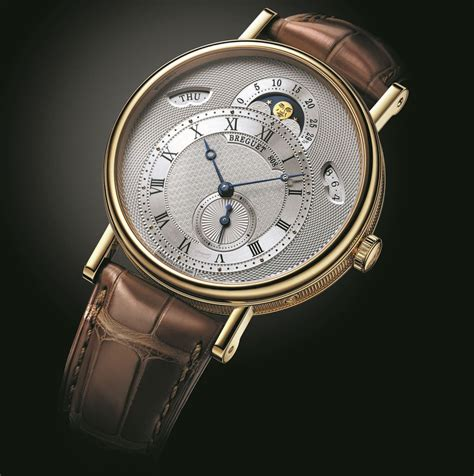

In [ ]:
Image.open(result).convert("RGB")

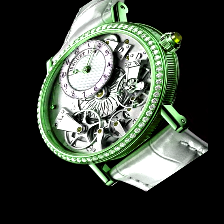

In [42]:
tensor_to_pil(query_image[0].detach().cpu())